# **Feedforward Networks**

A Feedforward Neural Network (FNN) is the simplest type of artificial neural network, where information moves only in one direction—from input to output, without loops or cycles.

# **Components of a Feedforward Neural Network**


* Input Layer → Takes input features.

* Hidden Layers → Apply weights, biases, and activation functions.

* Output Layer → Produces the final prediction.

* Activation Functions → Add non-linearity (e.g., ReLU, Sigmoid).

* Loss Function → Measures prediction error (e.g., MSE, CrossEntropy).

* Optimizer → Updates weights during training (e.g., Adam, SGD).

# **Forward Pass**

The forward pass in a neural network computes the output by applying weights, biases, and activation functions sequentially through each layer.

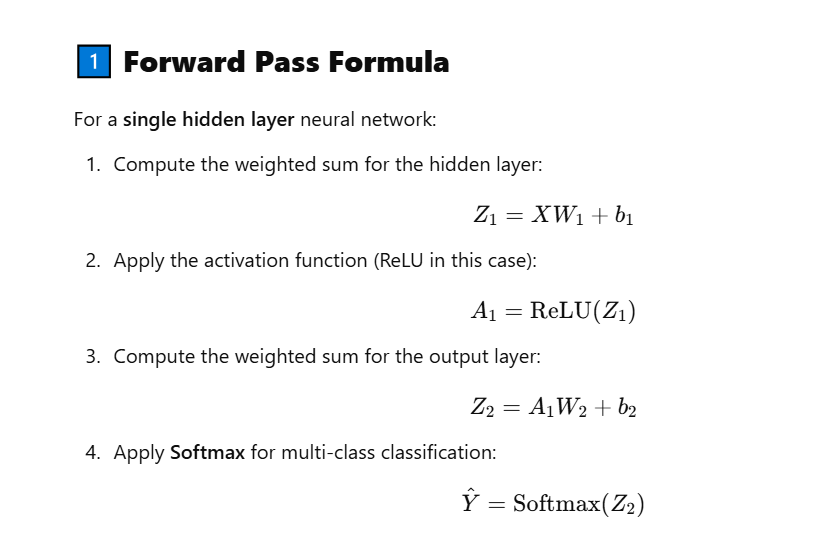

# **2️⃣ Forward Pass in PyTorch**

Let's manually compute the forward pass for a 2-layer feedforward network.

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Define input (batch_size=1, features=3)
X = torch.tensor([[0.5, 1.0, -0.5]])  # Shape: (1, 3)

# Define weights and biases
W1 = torch.tensor([[0.2, -0.3, 0.5], [-0.5, 0.1, 0.3]])  # Shape: (2, 3)
b1 = torch.tensor([0.1, -0.2])  # Shape: (2,)

W2 = torch.tensor([[0.4, -0.6], [0.3, 0.7]])  # Shape: (2, 2)
b2 = torch.tensor([-0.1, 0.2])  # Shape: (2,)

# Forward pass calculations
# Transpose W1 to make the matrix multiplication compatible
Z1 = torch.mm(X, W1.t()) + b1  # Linear transformation for hidden layer
A1 = F.relu(Z1)  # Activation function (ReLU)

Z2 = torch.mm(A1, W2) + b2  # Linear transformation for output layer
Y_hat = F.softmax(Z2, dim=1)  # Activation function (Softmax for multi-class classification)

# Print results
print("Z1 (Linear Hidden Layer Output):", Z1)
print("A1 (ReLU Activation Output):", A1)
print("Z2 (Linear Output Layer Output):", Z2)
print("Y_hat (Softmax Probabilities):", Y_hat)

Z1 (Linear Hidden Layer Output): tensor([[-0.3500, -0.5000]])
A1 (ReLU Activation Output): tensor([[0., 0.]])
Z2 (Linear Output Layer Output): tensor([[-0.1000,  0.2000]])
Y_hat (Softmax Probabilities): tensor([[0.4256, 0.5744]])


# **3️⃣ Understanding the Computation**

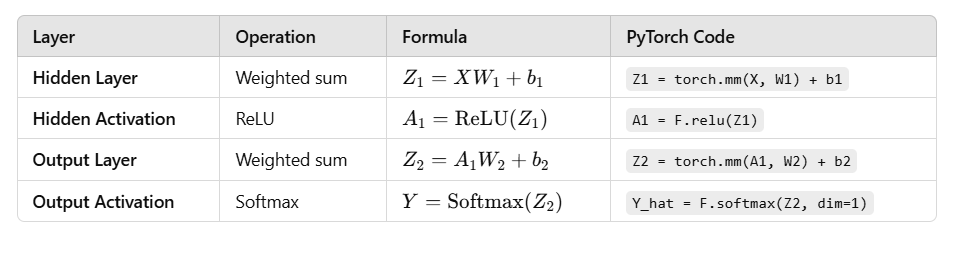

# **4️⃣ Forward Pass in a PyTorch Model**

If you're using a nn.Module model, the forward pass happens inside the forward() function:

In [3]:
class FeedForwardNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(FeedForwardNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))  # Hidden layer with ReLU
        x = self.fc2(x)  # Output layer (no softmax needed for CrossEntropyLoss)
        return x


# **5️⃣ Key Takeaways**

✅ Forward pass = Matrix Multiplication + Activation Functions


✅ Use ReLU in hidden layers (to introduce non-linearity).


✅ Softmax is applied only in the last layer (for multi-class classification).


✅ For regression, don't use Softmax—use Linear output.

# **Loss Computation**

The loss function measures the difference between the predicted output and the actual target values. During training, we minimize this loss using backpropagation and optimization.

# **1️⃣ Common Loss Functions in PyTorch**

🔹 Mean Squared Error (MSE Loss) → Regression


🔹 Cross Entropy Loss → Classification


🔹 Binary Cross Entropy (BCE Loss) → Binary Classification

# **2️⃣ Loss Computation in PyTorch**


Let's go through loss computation step-by-step using both MSELoss (for regression) and CrossEntropyLoss (for classification).

# 🟢 Example 1: Loss Computation for Regression (MSELoss)


**📌 Use Case: Predicting a continuous value, e.g., house prices.**

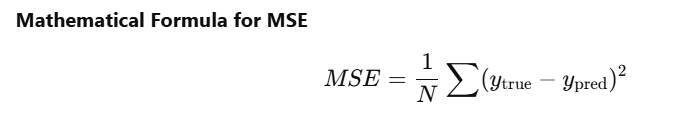

In [4]:
import torch
import torch.nn as nn

# Define target (true values) and predictions
y_true = torch.tensor([3.0, 4.5, 2.1])  # True values
y_pred = torch.tensor([2.5, 4.0, 2.8])  # Model's predicted values

# Define MSE loss function
mse_loss = nn.MSELoss()

# Compute loss
loss_value = mse_loss(y_pred, y_true)
print("MSE Loss:", loss_value.item())


MSE Loss: 0.33000001311302185


# ✅ MSE computes the average squared difference between predictions and true values.

# **🔵 Example 2: Loss Computation for Multi-Class Classification (CrossEntropyLoss)**

📌 Use Case: Classifying images into multiple categories (e.g., dog, cat, bird).

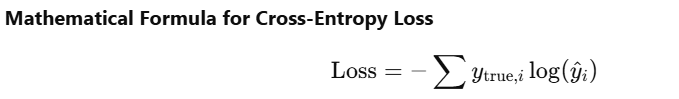

In [5]:
# True class labels (0 = Cat, 1 = Dog, 2 = Bird)
y_true = torch.tensor([0])  # The correct class is "0" (Cat)

# Model's raw output logits (before Softmax)
y_pred_logits = torch.tensor([[2.0, 1.0, 0.1]])  # Scores for (Cat, Dog, Bird)

# Define CrossEntropy loss function
ce_loss = nn.CrossEntropyLoss()

# Compute loss
loss_value = ce_loss(y_pred_logits, y_true)
print("Cross Entropy Loss:", loss_value.item())


Cross Entropy Loss: 0.4170299470424652


# ✅ Cross-Entropy Loss is used for classification problems. It penalizes incorrect predictions more.

# **🟠 Example 3: Loss Computation for Binary Classification (BCELoss)**

📌 Use Case: Classifying emails as Spam (1) or Not Spam (0).

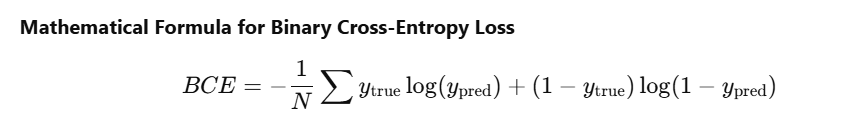

In [6]:
# True labels (binary classification)
y_true = torch.tensor([1.0, 0.0, 1.0])  # Ground truth labels

# Model's predicted probabilities (after Sigmoid)
y_pred_prob = torch.tensor([0.9, 0.2, 0.8])  # Predicted probabilities

# Define Binary Cross Entropy loss function
bce_loss = nn.BCELoss()

# Compute loss
loss_value = bce_loss(y_pred_prob, y_true)
print("Binary Cross Entropy Loss:", loss_value.item())


Binary Cross Entropy Loss: 0.18388254940509796


💡 When using raw logits instead of probabilities, use BCEWithLogitsLoss(), which applies Sigmoid automatically:

In [7]:
bce_logits_loss = nn.BCEWithLogitsLoss()


**✅ BCE Loss is used for binary classification problems where output is a probability (0 to 1).**

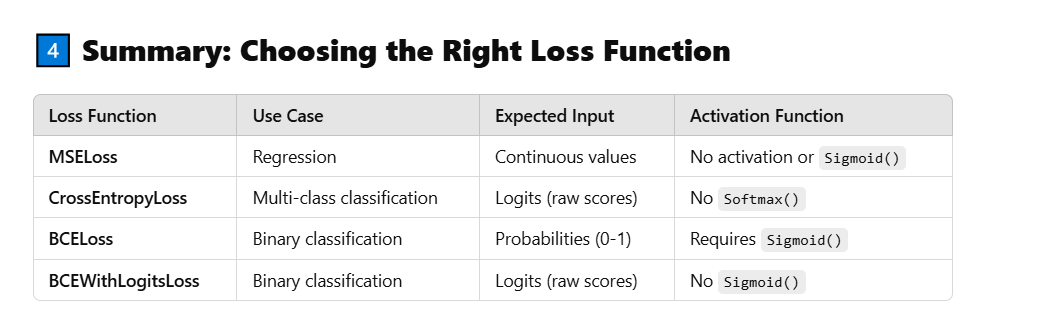

# **Backpropagation Calculation in a Feedforward Neural Network (PyTorch) 🚀**


Backpropagation is the process of computing the gradient of the loss function with respect to the model parameters (weights & biases) using the chain rule of differentiation. These gradients are then used to update the parameters during training.

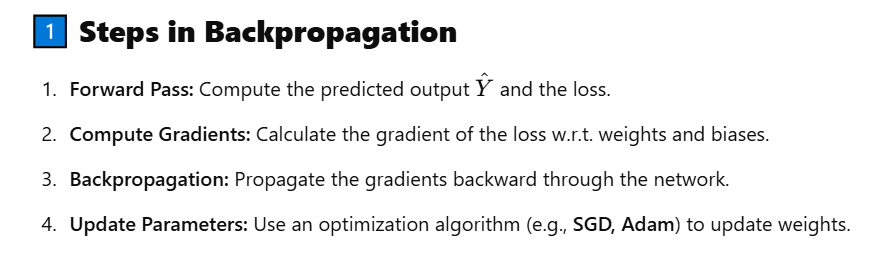

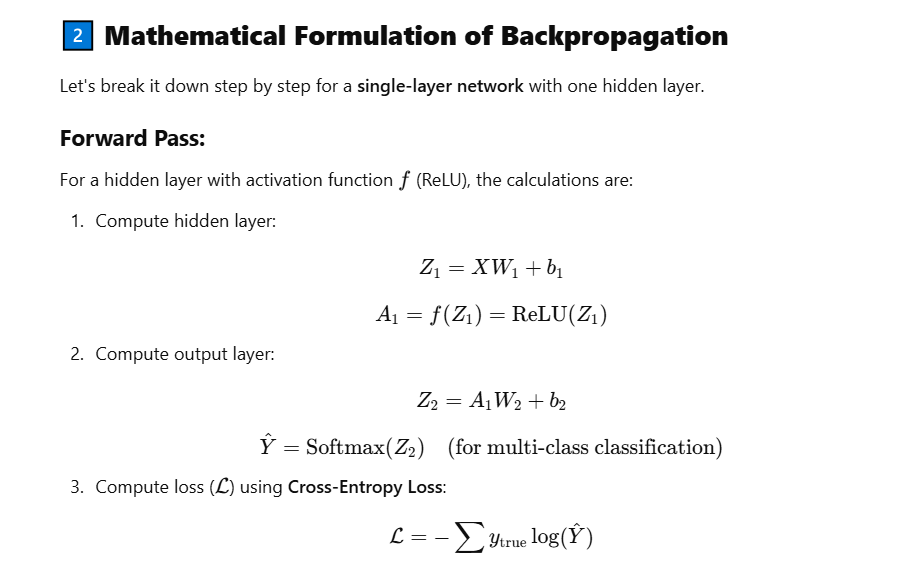

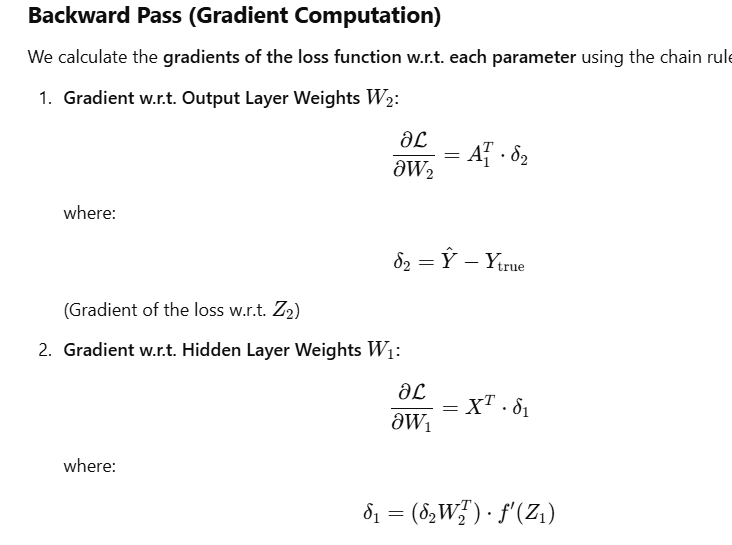

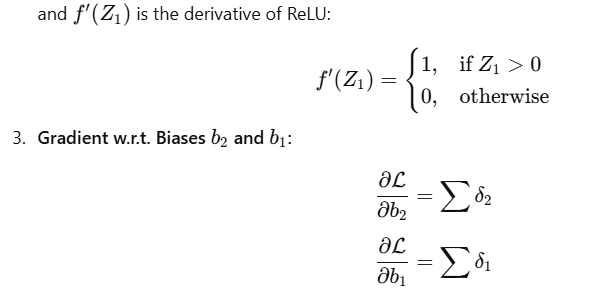

# **3️⃣ Backpropagation Implementation in PyTorch**

PyTorch automatically computes gradients using loss.backward(), but let's manually verify it.



# 🔹 Step 1: Define the Model

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define a simple feedforward network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(3, 2)  # Input: 3, Hidden: 2
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(2, 2)  # Output: 2 classes

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x  # Logits (CrossEntropyLoss applies Softmax)


# 🔹 Step 2: Initialize Data, Model, and Loss


In [10]:
# Input tensor (batch size = 1, features = 3)
X = torch.tensor([[0.5, 1.0, -0.5]], requires_grad=True)

# True label (class index)
y_true = torch.tensor([1])  # Class 1

# Create model
model = SimpleNN()

# Loss function
criterion = nn.CrossEntropyLoss()

# Optimizer
optimizer = optim.SGD(model.parameters(), lr=0.1)


# 🔹 Step 3: Forward Pass

In [11]:
# Forward pass
y_pred = model(X)  # Logits
loss = criterion(y_pred, y_true)  # Compute loss

print("Predicted logits:", y_pred)
print("Loss:", loss.item())


Predicted logits: tensor([[-0.1469, -0.7343]], grad_fn=<AddmmBackward0>)
Loss: 1.0293570756912231


# 🔹 Step 4: Backpropagation

In [12]:
# Compute gradients
optimizer.zero_grad()  # Clear previous gradients
loss.backward()  # Backpropagation

# Print gradients of each layer
for name, param in model.named_parameters():
    if param.grad is not None:
        print(f"Gradient of {name}:\n{param.grad}")


Gradient of fc1.weight:
tensor([[ 0.1328,  0.2656, -0.1328],
        [ 0.0000,  0.0000, -0.0000]])
Gradient of fc1.bias:
tensor([0.2656, 0.0000])
Gradient of fc2.weight:
tensor([[ 0.8756,  0.0000],
        [-0.8756, -0.0000]])
Gradient of fc2.bias:
tensor([ 0.6428, -0.6428])


**✅ PyTorch automatically computes gradients for every layer using the chain rule!**

# 🔹 Step 5: Parameter Update (Gradient Descent)

In [13]:
optimizer.step()  # Update model parameters


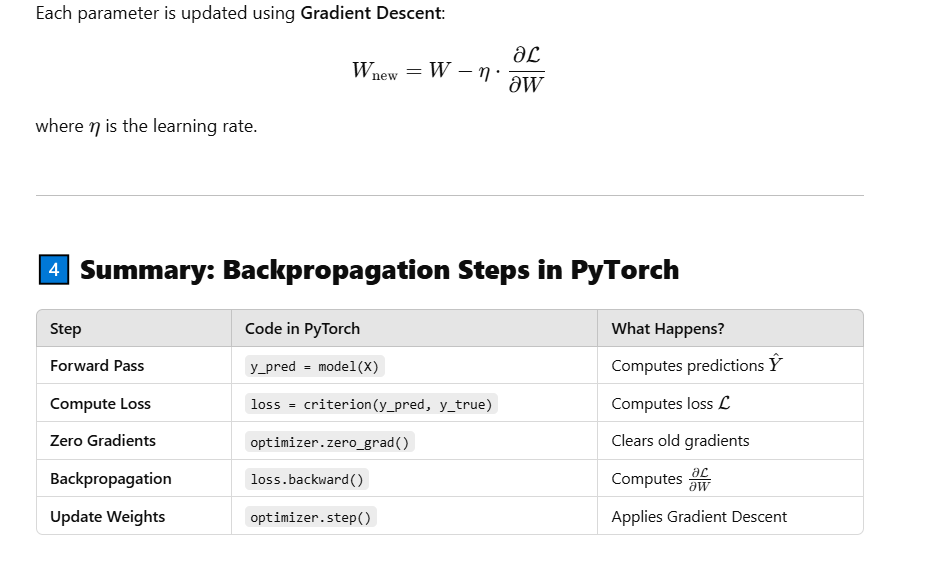

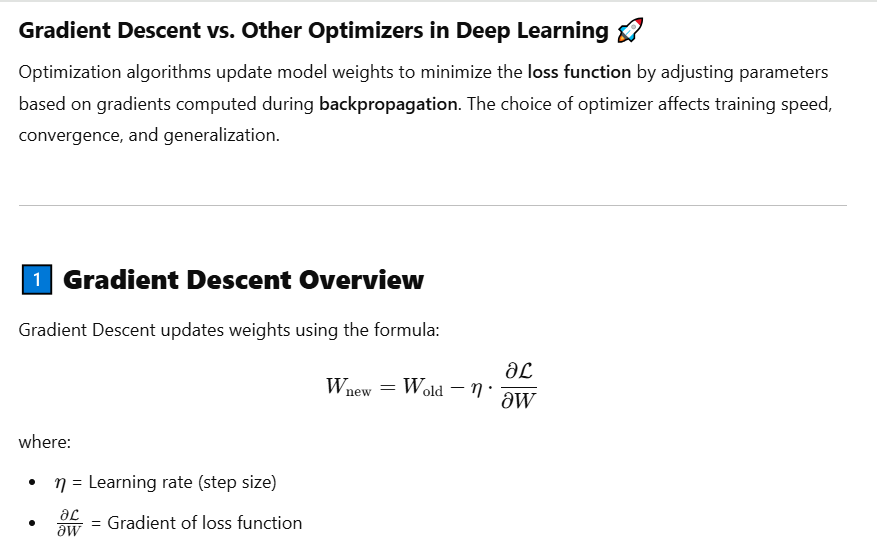

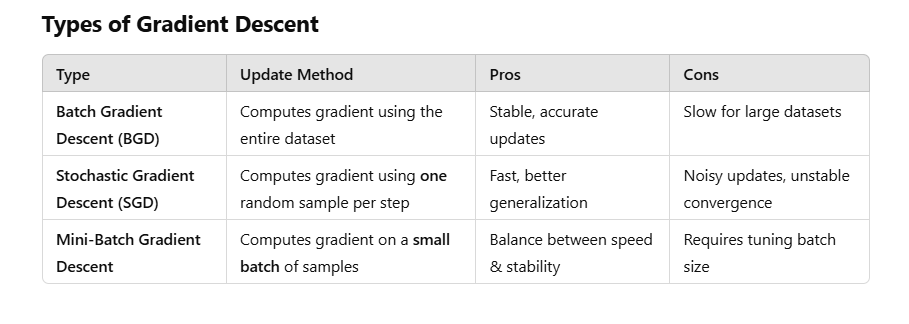

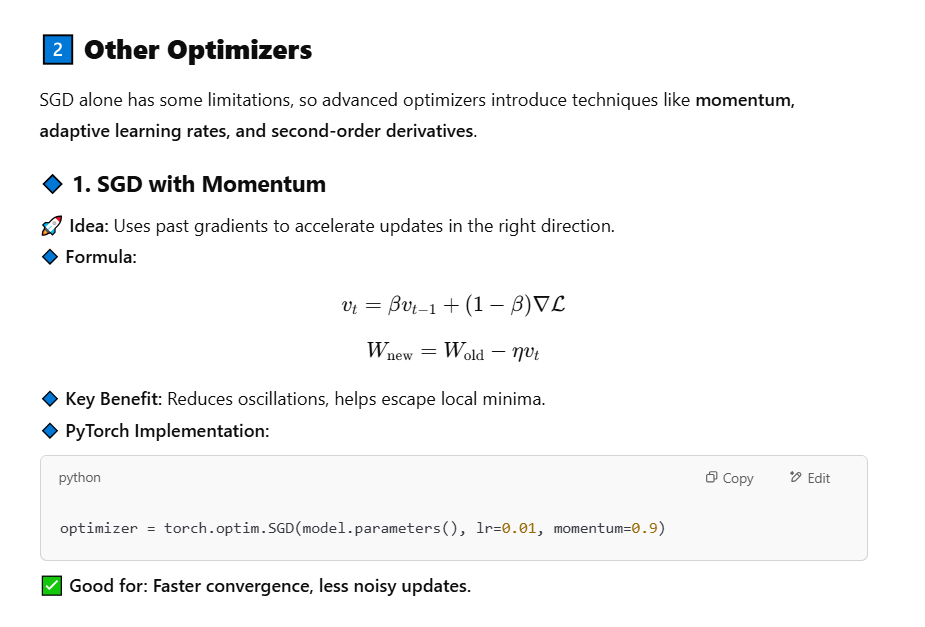

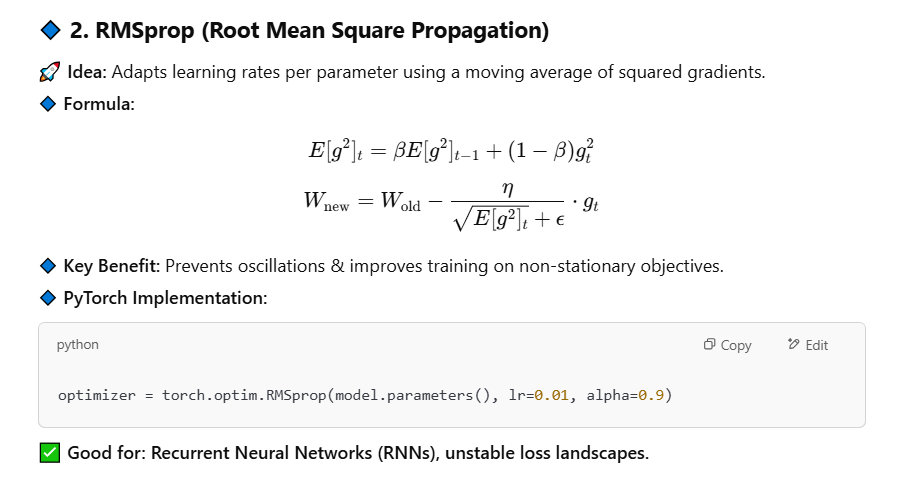

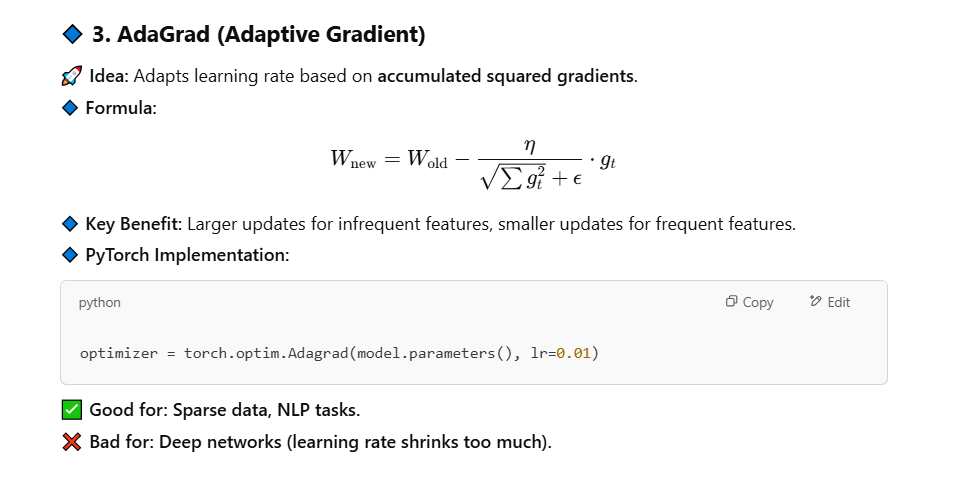

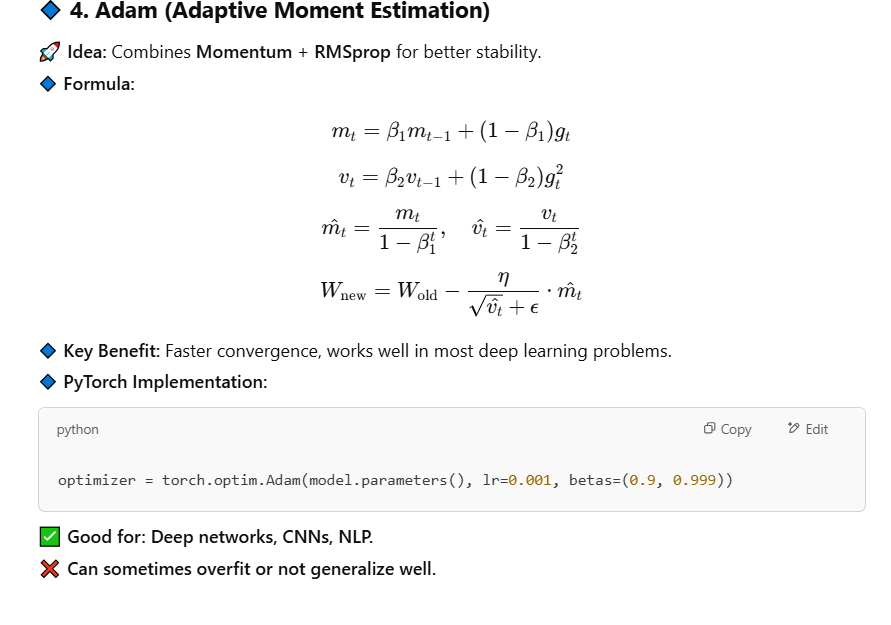

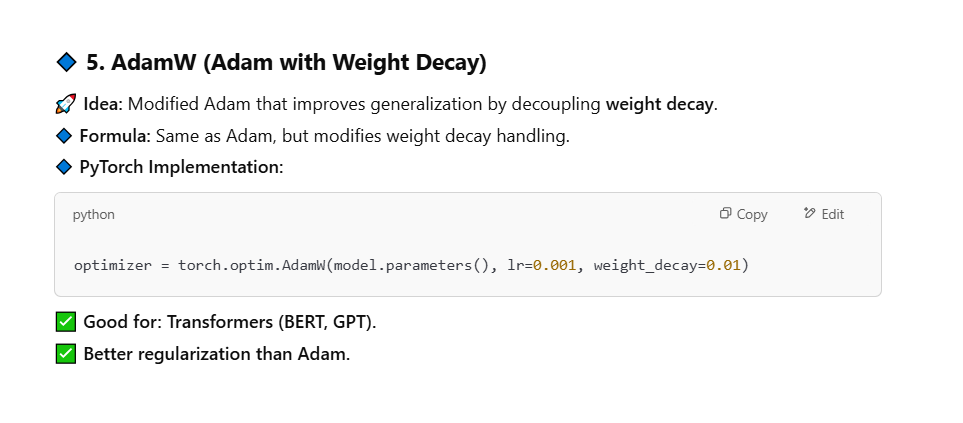

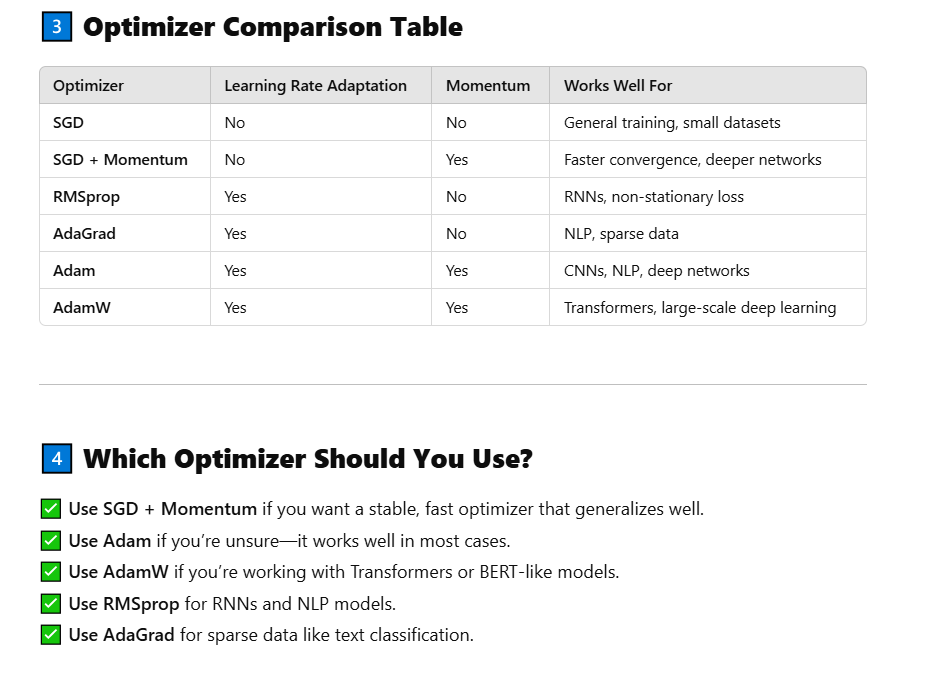